# The below Analysis based on the VIX Volatility Index. VIX is generated from the implied volatilities on index options for the S&P 500, and it shows the market's expectation of 30-day volatility. Known also as the "fear index," among other similar names, VIX is commonly used as a measure of investor confidence in the market, or, conversely, as a way of gauging how fearful market participants are that volatility will plague the space. The VIX tends to be largely based on stock market reactions; for instance, when the prices of stocks fall, VIX tends to Increase

## We will import the necessary libraries to bein our analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs 
import cufflinks as cf

### Import Data

In [165]:
data = pd.read_excel("resources/vix_data.xlsx")

### inspect data/clean -> Below we can see alot of data missing in certain columns. We will take and dextrace what we will need for an analysis

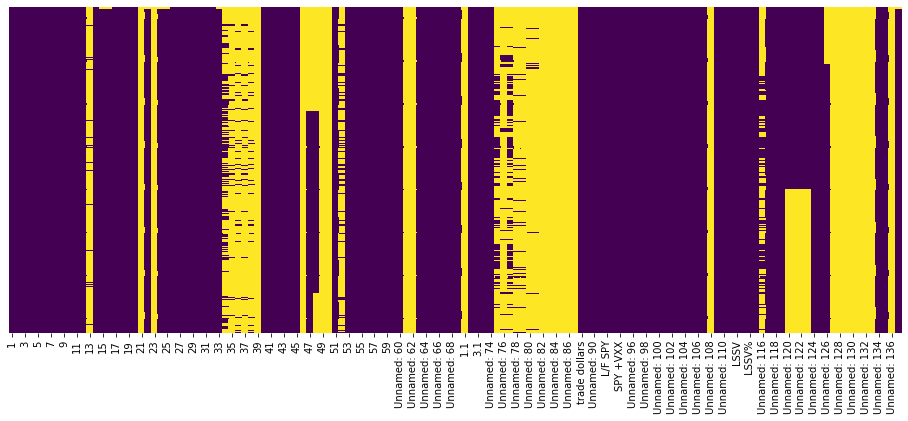

In [4]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [23]:
start_Data = data.loc[6:][[1,2,3,4,5,6,7,8,9,10]]

In [26]:
start_Data.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='object')

In [27]:
start_Data.columns = ["Date","UVXY", "SPY", "VXXBEN", "VIX", "UX1", "UX2","UX3","UX4", "Day of Week"]

In [29]:
start_Data.drop([6,7], inplace=True)

In [30]:
start_Data

,Date,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week
8,2006-10-23 00:00:00,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2
9,2006-10-24 00:00:00,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3
10,2006-10-25 00:00:00,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4
11,2006-10-26 00:00:00,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5
12,2006-10-27 00:00:00,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6
...,...,...,...,...,...,...,...,...,...,...
3249,2019-09-10 00:00:00,27.3,298.13,2.2625,15.2,16.225,17.675,18.025,17.875,2
3250,2019-09-11 00:00:00,26.61,300.25,2.4725,14.61,15.725,17.325,17.825,17.725,3
3251,2019-09-12 00:00:00,25.65,301.29,2.1575,14.22,14.975,17.025,17.625,17.575,4
3252,2019-09-13 00:00:00,25.11,301.09,2.3025,13.74,14.475,16.875,17.575,17.625,5


### Convert Date to Date Time

In [31]:
date_Time = pd.to_datetime(start_Data["Date"])

In [33]:
start_Data["dates"] = date_Time

#### Remove old dates

In [35]:
start_Data.drop("Date", inplace=True, axis=1)

In [36]:
start_Data

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week,dates
8,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2,2006-10-23
9,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,2006-10-24
10,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4,2006-10-25
11,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,2006-10-26
12,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6,2006-10-27
...,...,...,...,...,...,...,...,...,...,...
3249,27.3,298.13,2.2625,15.2,16.225,17.675,18.025,17.875,2,2019-09-10
3250,26.61,300.25,2.4725,14.61,15.725,17.325,17.825,17.725,3,2019-09-11
3251,25.65,301.29,2.1575,14.22,14.975,17.025,17.625,17.575,4,2019-09-12
3252,25.11,301.09,2.3025,13.74,14.475,16.875,17.575,17.625,5,2019-09-13


### Set index to new dates

In [38]:
start_Data.set_index("dates", inplace=True)

In [39]:
start_Data

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of Week
dates,,,,,,,,,
2006-10-23,8.37707e+09,137.47,1.91,11.08,11.95,13.16,14.08,14.6,2
2006-10-24,8.37707e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3
2006-10-25,7.96899e+09,138.35,1.76,10.66,11.49,12.52,13.79,14.52,4
2006-10-26,7.61865e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5
2006-10-27,7.69509e+09,137.91,1.24,10.8,11.31,12.26,13.46,14.24,6
...,...,...,...,...,...,...,...,...,...
2019-09-10,27.3,298.13,2.2625,15.2,16.225,17.675,18.025,17.875,2
2019-09-11,26.61,300.25,2.4725,14.61,15.725,17.325,17.825,17.725,3
2019-09-12,25.65,301.29,2.1575,14.22,14.975,17.025,17.625,17.575,4


## Will being in more data from the main file that may be used for analysis

## Days to roll

In [178]:
DaysTORoll = list(data[14].iloc[8:])

In [180]:
start_Data["Days to Roll"] = DaysTORoll

In [183]:
start_Data.drop("Daily Decay", inplace=True, axis=1)


In [198]:
days_incycle = list(data.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18], axis=1)[22].iloc[8:])

In [199]:
start_Data["Day in Cycle"] = days_incycle

In [206]:
daily_Decay = list(data.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25], axis=1)[33].iloc[8:])

In [207]:
start_Data["Daily Decay"] = daily_Decay

In [215]:
VXXGREG = list(data.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,
          30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46], axis=1)[51].iloc[8:])

In [216]:
start_Data["VXXGREG"] = VXXGREG

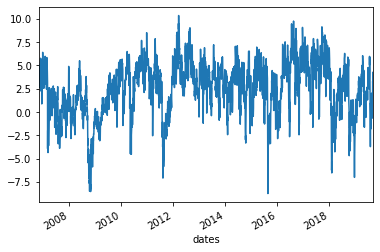

In [218]:
start_Data["VXXGREG"].plot()

In [222]:
data.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,
          30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51], axis=1).iloc[8:]

,16,52,53,54,55,56,57,58,59,60,...,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137
8,NaN,NaN,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100,100000,NaN,NaN
9,NaN,NaN,0,0,0,0,0,0,100.298,100,...,NaN,NaN,NaN,NaN,NaN,NaN,100.298,100298,NaN,NaN
10,NaN,NaN,0,0,0,0,0,0,100.64,100,...,NaN,NaN,NaN,NaN,NaN,NaN,100.64,100640,NaN,NaN
11,NaN,NaN,0,0,0,0,0,0,100.953,100,...,NaN,NaN,NaN,NaN,NaN,NaN,100.953,100953,NaN,NaN
12,NaN,NaN,0,0,0,0,0,0,100.32,100,...,NaN,NaN,NaN,NaN,NaN,NaN,100.32,100320,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,3239,NaN,0,340.09,101391,0,-61632.9,39758.1,216.869,139.758,...,NaN,NaN,NaN,NaN,NaN,NaN,216.869,216869,NaN,0.00372277
3250,3239,NaN,0,340.09,102112,0,-61632.9,40479.1,218.411,140.479,...,NaN,NaN,NaN,NaN,NaN,NaN,218.411,218411,NaN,0.00479954
3251,3239,NaN,0,340.09,102466,0,-61632.9,40832.8,219.168,140.833,...,NaN,NaN,NaN,NaN,NaN,NaN,219.168,219168,NaN,0.00577128
3252,3239,NaN,0,340.09,102398,0,-61632.9,40764.7,219.022,140.765,...,NaN,NaN,NaN,NaN,NaN,NaN,219.022,219022,NaN,0.00670844


In [226]:
start_Data["VXXBEN"].iplot()

KeyboardInterrupt: 